### 분류용 선형 모델

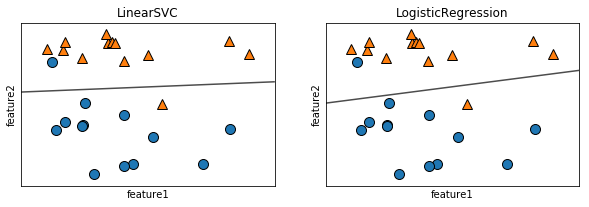

In [8]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

x, y =mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2,figsize = (10,3))

for model, ax in zip([LinearSVC(), LogisticRegression()],axes):
    clf = model.fit(x,y)
    mglearn.plots.plot_2d_separator(clf,x,fill=False,eps=0.5,ax=ax,alpha=.7)
    
    mglearn.discrete_scatter(x[:,0],x[:,1],y,ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("feature1")
    ax.set_ylabel("feature2")



### 규제 매개변수 c값에 따른 그래프 변화

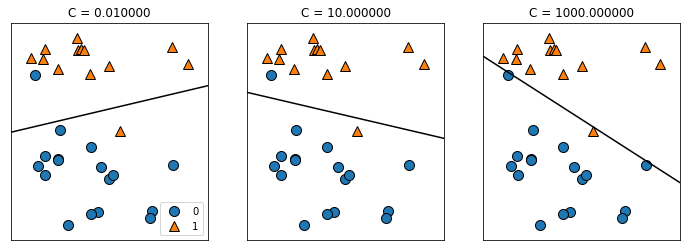

In [9]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

mglearn.plots.plot_linear_svc_regularization()

### c값 증가 : 오버핏팅 가능성 증가 -> 규제 감소 :                                   3번 그래프
### c값 감소 : 언더핏팅 가능성 증가 -> 규제 증가 : w값이 0에 가까워짐. 1번 그래프

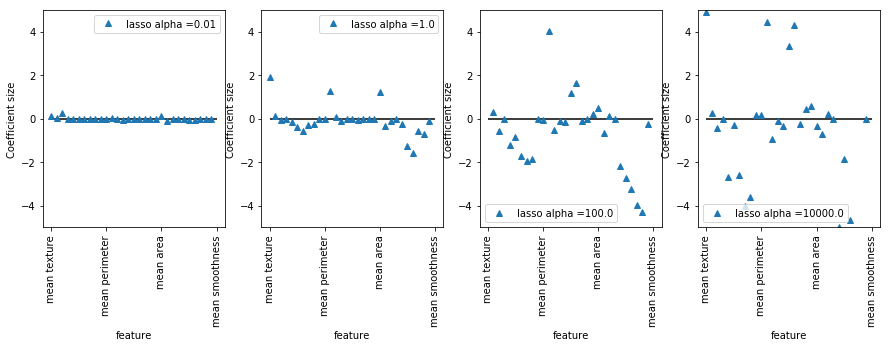

In [47]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

cancer = load_breast_cancer()
x_train,x_test,y_train,y_test = train_test_split(cancer.data, cancer.target, stratify= cancer.target, random_state=42)

fig, axes = plt.subplots(1,4,figsize=(15,4)) #subplots(열로 배열할 그림수, 행으로 배열 할 그림수, figsize = 그림크기 (x,y))
j = 0.01

logistic001 = LogisticRegression(C=0.01).fit(x_train,y_train)
logistic = LogisticRegression().fit(x_train,y_train)
logistic100 = LogisticRegression(C=100).fit(x_train,y_train)
logistic10000 = LogisticRegression(C=10000).fit(x_train,y_train)

list = [logistic001,logistic,logistic100,logistic10000]

for i,ax in zip(list,axes):
    ax.plot(i.coef_.T,"^", label = "lasso alpha ="+str(j))
    j *=100
    ax.set_xticklabels(cancer.feature_names, rotation=90)
    ax.set_xlabel("feature")#계수 목록
    ax.set_ylabel("Coefficient size")#계수 크기
    ax.hlines(0,0,cancer.data.shape[1])
    ax.set_ylim(-5,5)

    ax.legend()

C=0.001 훈련 정확도 :0.91
C=0.001 테스트 정확도 :0.92
C=1.000 훈련 정확도 :0.96
C=1.000 테스트 정확도 :0.96
C=100.000 훈련 정확도 :0.99
C=100.000 테스트 정확도 :0.98


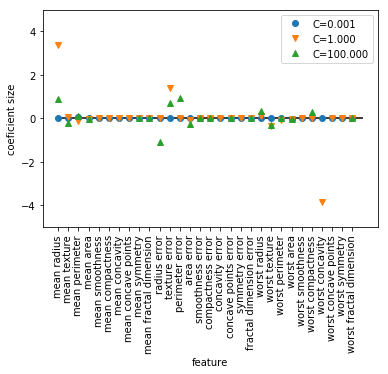

In [55]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

cancer = load_breast_cancer()
x_train,x_test,y_train,y_test = train_test_split(cancer.data, cancer.target, stratify= cancer.target, random_state=42)

logistic001 = LogisticRegression(C=0.01).fit(x_train,y_train)
logistic = LogisticRegression().fit(x_train,y_train)
logistic100 = LogisticRegression(C=100).fit(x_train,y_train)
logistic10000 = LogisticRegression(C=10000).fit(x_train,y_train)

for C, marker in zip([0.001,1,100],["o","v","^"]):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(x_train,y_train)
    print("C={:.3f} 훈련 정확도 :{:.2f}".format(C,lr_l1.score(x_train,y_train)))
    print("C={:.3f} 테스트 정확도 :{:.2f}".format(C,lr_l1.score(x_test,y_test)))
    plt.plot(lr_l1.coef_.T, marker, label ="C={:.3f}".format(C))
plt.xticks(range(cancer.data.shape[1]),cancer.feature_names,rotation=90)
plt.hlines(0,0,cancer.data.shape[1])
plt.xlabel("feature")
plt.ylabel("coeficient size")
plt.ylim(-5,5)
plt.legend()